In [1]:
import pandas as pd

data = pd.read_csv("data/adult.csv", usecols=lambda x: x != "fnlwgt")
# data.head()
data.columns.tolist()

['age',
 'workclass',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'native-country',
 'class']

List all possible values for each column and ensure visually all the possible values it has

In [2]:
print(f'Number of instances: {len(data)}')
print(f'Attribute names: {data.columns.to_list()}')
print(f'Number of missing attribute values: {data.isnull().sum().sum()}')
series = data.isnull().sum()
print(f'List of attribute names with at least one missing value {series[series>0].keys().to_list()}')
print(f"Percentage of instances corresponding to individuals whose education level is Bachelors or Masters: {(len(data[(data['education'] == 'Masters') | (data['education'] == 'Bachelors')]) / len(data) * 100)}%")

Number of instances: 48842
Attribute names: ['age', 'workclass', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capitalgain', 'capitalloss', 'hoursperweek', 'native-country', 'class']
Number of missing attribute values: 6465
List of attribute names with at least one missing value ['workclass', 'occupation', 'native-country']
Percentage of instances corresponding to individuals whose education level is Bachelors or Masters: 21.870521272675155%


In [3]:
encoded_data = pd.get_dummies(data.dropna(), columns=data.columns)
class_less_50_name = "class_<=50K"
class_greater_50_name = "class_>50K"
encoded_data.loc[
    :,
    (encoded_data.columns != class_less_50_name)
    & (encoded_data.columns != class_greater_50_name),
]

,age_0,age_1,age_2,age_3,age_4,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,False,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
48837,False,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
48839,False,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
48840,False,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [4]:
x = encoded_data.loc[:, (encoded_data.columns != 'class_<=50K') & (encoded_data.columns != 'class_>50K')]
y = encoded_data.loc[:, (encoded_data.columns == 'class_<=50K')]

Score: 0.0
Training score: 0.9209222785705862
Test score: 0.8145232619847869
Accuracy: 0.8145232619847869
Precision per class: [0.6128692  0.88229733]
Recall per class: [0.63636364 0.8714836 ]
F1-score per class: [0.62439549 0.87685713]


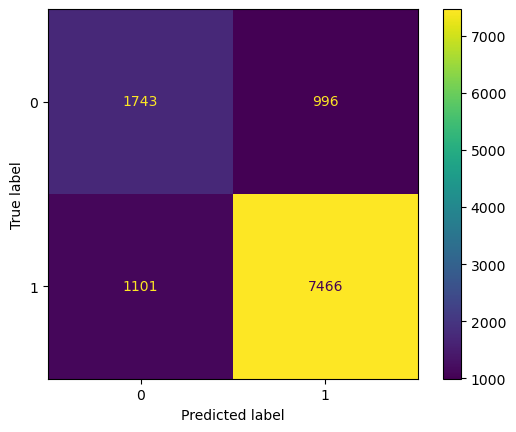

In [5]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from scripts.metrics_helper import compute_metrics

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0)

decision_tree = tree.DecisionTreeClassifier(random_state = 0)

decision_tree.fit(X_train, y_train)
compute_metrics(decision_tree, X_test, y_test, X_train, y_train)

In [6]:
pd.Series(decision_tree.predict(X_train))

0         True
1         True
2         True
3         True
4         True
         ...  
33911     True
33912    False
33913    False
33914    False
33915     True
Length: 33916, dtype: bool

In [7]:
X_train

,age_0,age_1,age_2,age_3,age_4,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
39332,False,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1173,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
19377,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
14697,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
46567,False,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32823,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
22924,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
46005,False,False,False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
47040,False,False,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
